# Constrained optimization

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Basic setup

We consider a smooth objective/cost function $\phi:\mathbb R^n\times \mathbb R^r\to \mathbb R$ that depends on design/control parameters $x$ and random parameters $\xi$:

$$
  \phi(x,\xi)
$$

We cannot directly optimize over $x$ as that function still depends on the random variable $\xi$ which follows a distribution. 
Below, we discuss some aspects of stochastic optimization:

- Scalarization: risk-neutral, risk-averse and robust

For fixed $x$, we can take random draws from the distribution $\phi(x,\xi)$ and plot the resulting as a histogram. This is commonly known as the stochastic average approximation (SAA). 

##  Simple model problem

Let's look at a simple model function where $x=(x_1,x_2)$ and $\xi=(\xi_1,\xi_2)$ is a random variable:

$$
    \phi(x,\xi):= (1+\xi_1)*x_1^2 - x_2 - \log(-x_2) + \xi_2^2
$$


In [17]:
def phi(x1,x2,xi1,xi2):
    "Objective involving uncertainties xi1, xi2"
    return (1+xi1)*x1**2 - x2 - np.log(-x2) + xi2**2


Pmean: 2.0822903443373653
Pvar: 0.009020502040906056
Pmax: 2.333847215590718


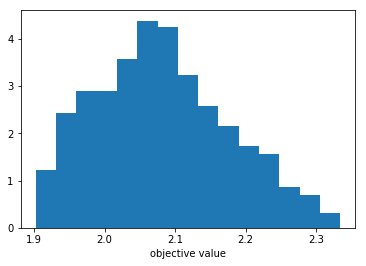

In [43]:
def plot_phi(x1,x2):
    "Draw histogram for fixed x1,x2"
    "Distribution of xi"
    no_samp = 1000
    XI1 = np.random.uniform(-0.1,0.1,no_samp)
    XI2 = np.random.uniform(-0.5,0.5,no_samp)
    #XI2 = np.random.normal(0,0.3,no_samp)
    P = phi(x1,x2,XI1,XI2)
    P_mean = np.mean(P)
    P_var = np.var(P)
    P_max = np.amax(P)
    print('Pmean:',P_mean)
    print('Pvar:',P_var)
    print('Pmax:',P_max)
    print
    count, bins, ignored = plt.hist(P, 15, density=True)
    plt.xlabel('objective value')
    plt.show()
    
plot_phi(1,-1)


## Objectives for optimization

From this sampled distribution, we can compute various scalar quantities that we can in a minimization over $x$, which we kept fixed above:

For fixed $x$, we can consider:

1. **Risk-neutral** formulation: Take expectation over $\xi$:

    $$
    \min_{x} \mathbb E_{\xi} \phi(x,\xi)
    $$

2. **Risk-averse** formulations: Avoid poor outcomes, e.g.,
    keep variance small:
    
    $$
    \min_{x} \mathbb E_{\xi} \phi(x,\xi) + \mathbb
    V_{\xi}\phi(x,\xi)
    $$
    
3. **Robust** formulations: Minimize worst outcome (no risk!)
    
    $$
    \min_{x} \max_{\xi} \phi(x,\xi)
    $$


NameError: name 'P' is not defined